- Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/
- Código realizado por: Enrique V. Mattos - 07/04/2024

# **1° Passo:** Instalando as bibliotecas

In [1]:
!pip install -q proplot

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

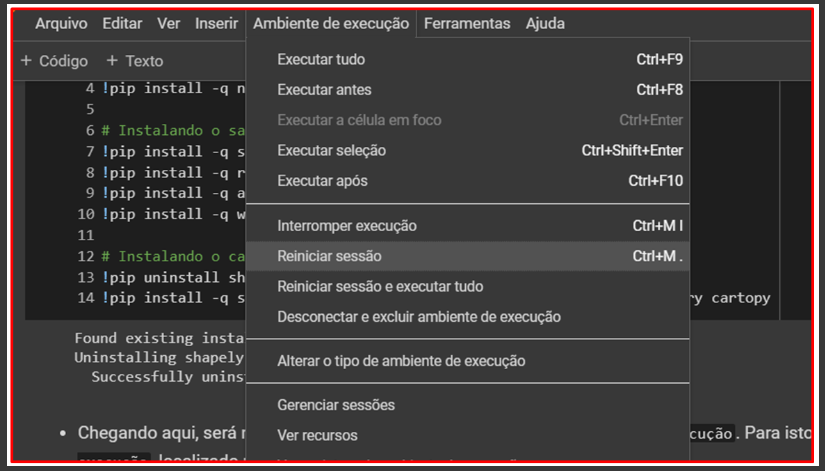

# **2° Passo:** Importando bibliotecas

In [2]:
import numpy as np
import proplot as pplt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from zipfile import ZipFile


# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


#Leitura dos dados de focos de calor

Baixando os dados

In [3]:
anoi, anof = 2003, 2023
for ano in np.arange(anoi, anof+1):

    # baixando arquivos
    filename = f'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_{ano}.zip'
    !wget {filename}

    # descompactando arquivo ZIP
    with ZipFile(f"/content/focos_br_mg_ref_{ano}.zip", 'r') as zObject:

        # extraindo os membros do arquivo ZIP para uma localicação específica
        zObject.extractall(path='/content')

--2024-04-08 20:40:52--  https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_2003.zip
Resolving dataserver-coids.inpe.br (dataserver-coids.inpe.br)... 150.163.218.16
Connecting to dataserver-coids.inpe.br (dataserver-coids.inpe.br)|150.163.218.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 382636 (374K) [application/zip]
Saving to: ‘focos_br_mg_ref_2003.zip’

focos_br_mg_ref_200 100%[===================>] 373.67K   626KB/s    in 0.6s    

2024-04-08 20:40:54 (626 KB/s) - ‘focos_br_mg_ref_2003.zip’ saved [382636/382636]

--2024-04-08 20:40:54--  https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/focos_br_mg_ref_2004.zip
Resolving dataserver-coids.inpe.br (dataserver-coids.inpe.br)... 150.163.218.16
Connecting to dataserver-coids.inpe.br (dataserver-coids.inpe.br)|150.163.218.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265077 (259K) [

Lendo os dados

In [4]:
# cria uma tabela (conhecida também com o nome em inglês de "dataframe") vazia
df = pd.DataFrame()

# loop de cada arquivo da lista files
for ano in np.arange(anoi, anof+1):

    # leitura da tabela
    df0 = pd.read_csv(f'/content/focos_br_mg_ref_{ano}.csv')

    # junta a tabela que foi lida com a anterior
    df = pd.concat([df, df0], ignore_index=True)

    # imprime o nome do arquivo lido na tela
    print(f'/content/focos_br_mg_ref_{ano}.csv', df0.shape[0])

# transforma a coluna "datahora" para o formato "datetime"
df['data_pas'] = pd.to_datetime(df['data_pas'])

# seta a coluna "datahora" como o índice da tabela
df.set_index('data_pas', inplace=True)

# mostra o dataframe
df

/content/focos_br_mg_ref_2003.csv 19426
/content/focos_br_mg_ref_2004.csv 13229
/content/focos_br_mg_ref_2005.csv 13702
/content/focos_br_mg_ref_2006.csv 8832
/content/focos_br_mg_ref_2007.csv 22514
/content/focos_br_mg_ref_2008.csv 11888
/content/focos_br_mg_ref_2009.csv 4936
/content/focos_br_mg_ref_2010.csv 13766
/content/focos_br_mg_ref_2011.csv 11766
/content/focos_br_mg_ref_2012.csv 10108
/content/focos_br_mg_ref_2013.csv 5387
/content/focos_br_mg_ref_2014.csv 11337
/content/focos_br_mg_ref_2015.csv 9490
/content/focos_br_mg_ref_2016.csv 6482
/content/focos_br_mg_ref_2017.csv 8383
/content/focos_br_mg_ref_2018.csv 4627
/content/focos_br_mg_ref_2019.csv 9999
/content/focos_br_mg_ref_2020.csv 8737
/content/focos_br_mg_ref_2021.csv 12110
/content/focos_br_mg_ref_2022.csv 7790
/content/focos_br_mg_ref_2023.csv 6502


,id_bdq,foco_id,lat,lon,pais,estado,municipio,bioma
data_pas,,,,,,,,
2003-05-15 17:05:00,9988882,5e864492-5abb-11e8-911c-28924ad12c5c,-17.61200,-47.16000,Brasil,MINAS GERAIS,GUARDA-MOR,Cerrado
2003-05-15 17:05:00,9988878,5e86448f-5abb-11e8-911c-28924ad12c5c,-17.01500,-46.32900,Brasil,MINAS GERAIS,PARACATU,Cerrado
2003-05-15 17:05:00,9988876,5e86448d-5abb-11e8-911c-28924ad12c5c,-17.61400,-47.17200,Brasil,MINAS GERAIS,GUARDA-MOR,Cerrado
2003-05-15 17:04:00,9988840,5e86447a-5abb-11e8-911c-28924ad12c5c,-19.98700,-48.25100,Brasil,MINAS GERAIS,CONCEIÇÃO DAS ALAGOAS,Cerrado
2003-05-15 17:04:00,9988830,5e864470-5abb-11e8-911c-28924ad12c5c,-19.98800,-48.26100,Brasil,MINAS GERAIS,CONCEIÇÃO DAS ALAGOAS,Cerrado
...,...,...,...,...,...,...,...,...
2023-12-30 16:39:00,1665902606,36d3a881-ca0b-3311-abed-a00ff04436d4,-15.83325,-40.43346,Brasil,MINAS GERAIS,JORDÂNIA,Mata Atlântica
2023-12-30 16:39:00,1665902607,54f544b7-3d68-313e-83a5-f2b8c73720a5,-15.80780,-41.98963,Brasil,MINAS GERAIS,TAIOBEIRAS,Mata Atlântica
2023-12-30 16:39:00,1665902608,93feaecf-ba30-3027-a30d-23b8f6c684d2,-15.80602,-41.97527,Brasil,MINAS GERAIS,TAIOBEIRAS,Mata Atlântica


#Agrupando os dados por mês

In [5]:
%%time
# agrupa os dados por dia
df_mes = df.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1M')).count()['estado']

# mostra os dados
df_mes

CPU times: user 216 ms, sys: 49 ms, total: 265 ms
Wall time: 276 ms


data_pas
2003-01-31      47
2003-02-28     181
2003-03-31     123
2003-04-30     265
2003-05-31     369
              ... 
2023-08-31    1029
2023-09-30    1795
2023-10-31     919
2023-11-30     642
2023-12-31     373
Freq: M, Name: estado, Length: 252, dtype: int64

In [6]:
# valores
df_mes.values

array([  47,  181,  123,  265,  369, 1065, 1465, 2094, 7489, 5540,  508,
        280,   29,   36,  125,  161,  237,  303,  831, 1865, 5288, 3062,
       1066,  226,   52,  106,  157,  227,  230,  336,  874, 1520, 2301,
       7145,  548,  206,  168,  135,  103,  153,  379,  444, 1277, 1948,
       3077,  815,  195,  138,  115,   99,  263,  188,  473,  884, 1429,
       3681, 6800, 5880, 2306,  396,   99,   84,  113,  172,  285,  283,
        767, 1448, 2765, 4299, 1436,  137,   82,  104,  132,   61,  200,
        216,  515,  702, 1380, 1128,  310,  106,  132,  185,  121,  144,
        246,  619, 1040, 3634, 5200, 2196,  119,  130,  112,  131,   82,
         97,  201,  387,  889, 2445, 5930, 1251,  192,   49,   90,  140,
        181,  201,  178,  245,  701,  919, 2919, 4038,  258,  238,   93,
        161,  136,   80,  182,  191,  512,  933, 1618, 1157,  244,   80,
        130,  121,   62,  145,  208,  344,  537, 1791, 3154, 4373,  349,
        123,  127,   69,   62,   85,  109,  192,  2

In [7]:
# matriz com formato de anos x meses
focos_table = np.reshape(df_mes.values, ((anof-anoi)+1, 12), order='C')
focos_table

array([[  47,  181,  123,  265,  369, 1065, 1465, 2094, 7489, 5540,  508,
         280],
       [  29,   36,  125,  161,  237,  303,  831, 1865, 5288, 3062, 1066,
         226],
       [  52,  106,  157,  227,  230,  336,  874, 1520, 2301, 7145,  548,
         206],
       [ 168,  135,  103,  153,  379,  444, 1277, 1948, 3077,  815,  195,
         138],
       [ 115,   99,  263,  188,  473,  884, 1429, 3681, 6800, 5880, 2306,
         396],
       [  99,   84,  113,  172,  285,  283,  767, 1448, 2765, 4299, 1436,
         137],
       [  82,  104,  132,   61,  200,  216,  515,  702, 1380, 1128,  310,
         106],
       [ 132,  185,  121,  144,  246,  619, 1040, 3634, 5200, 2196,  119,
         130],
       [ 112,  131,   82,   97,  201,  387,  889, 2445, 5930, 1251,  192,
          49],
       [  90,  140,  181,  201,  178,  245,  701,  919, 2919, 4038,  258,
         238],
       [  93,  161,  136,   80,  182,  191,  512,  933, 1618, 1157,  244,
          80],
       [ 130,  121,  

#Plota figura

Vamos plotar uma figura que mostra a distrbuição de ocorrência de focos de calor por `dia da semana` e `mês`. Para isto usaremos a biblioteca [calplot](https://calplot.readthedocs.io/en/latest/).

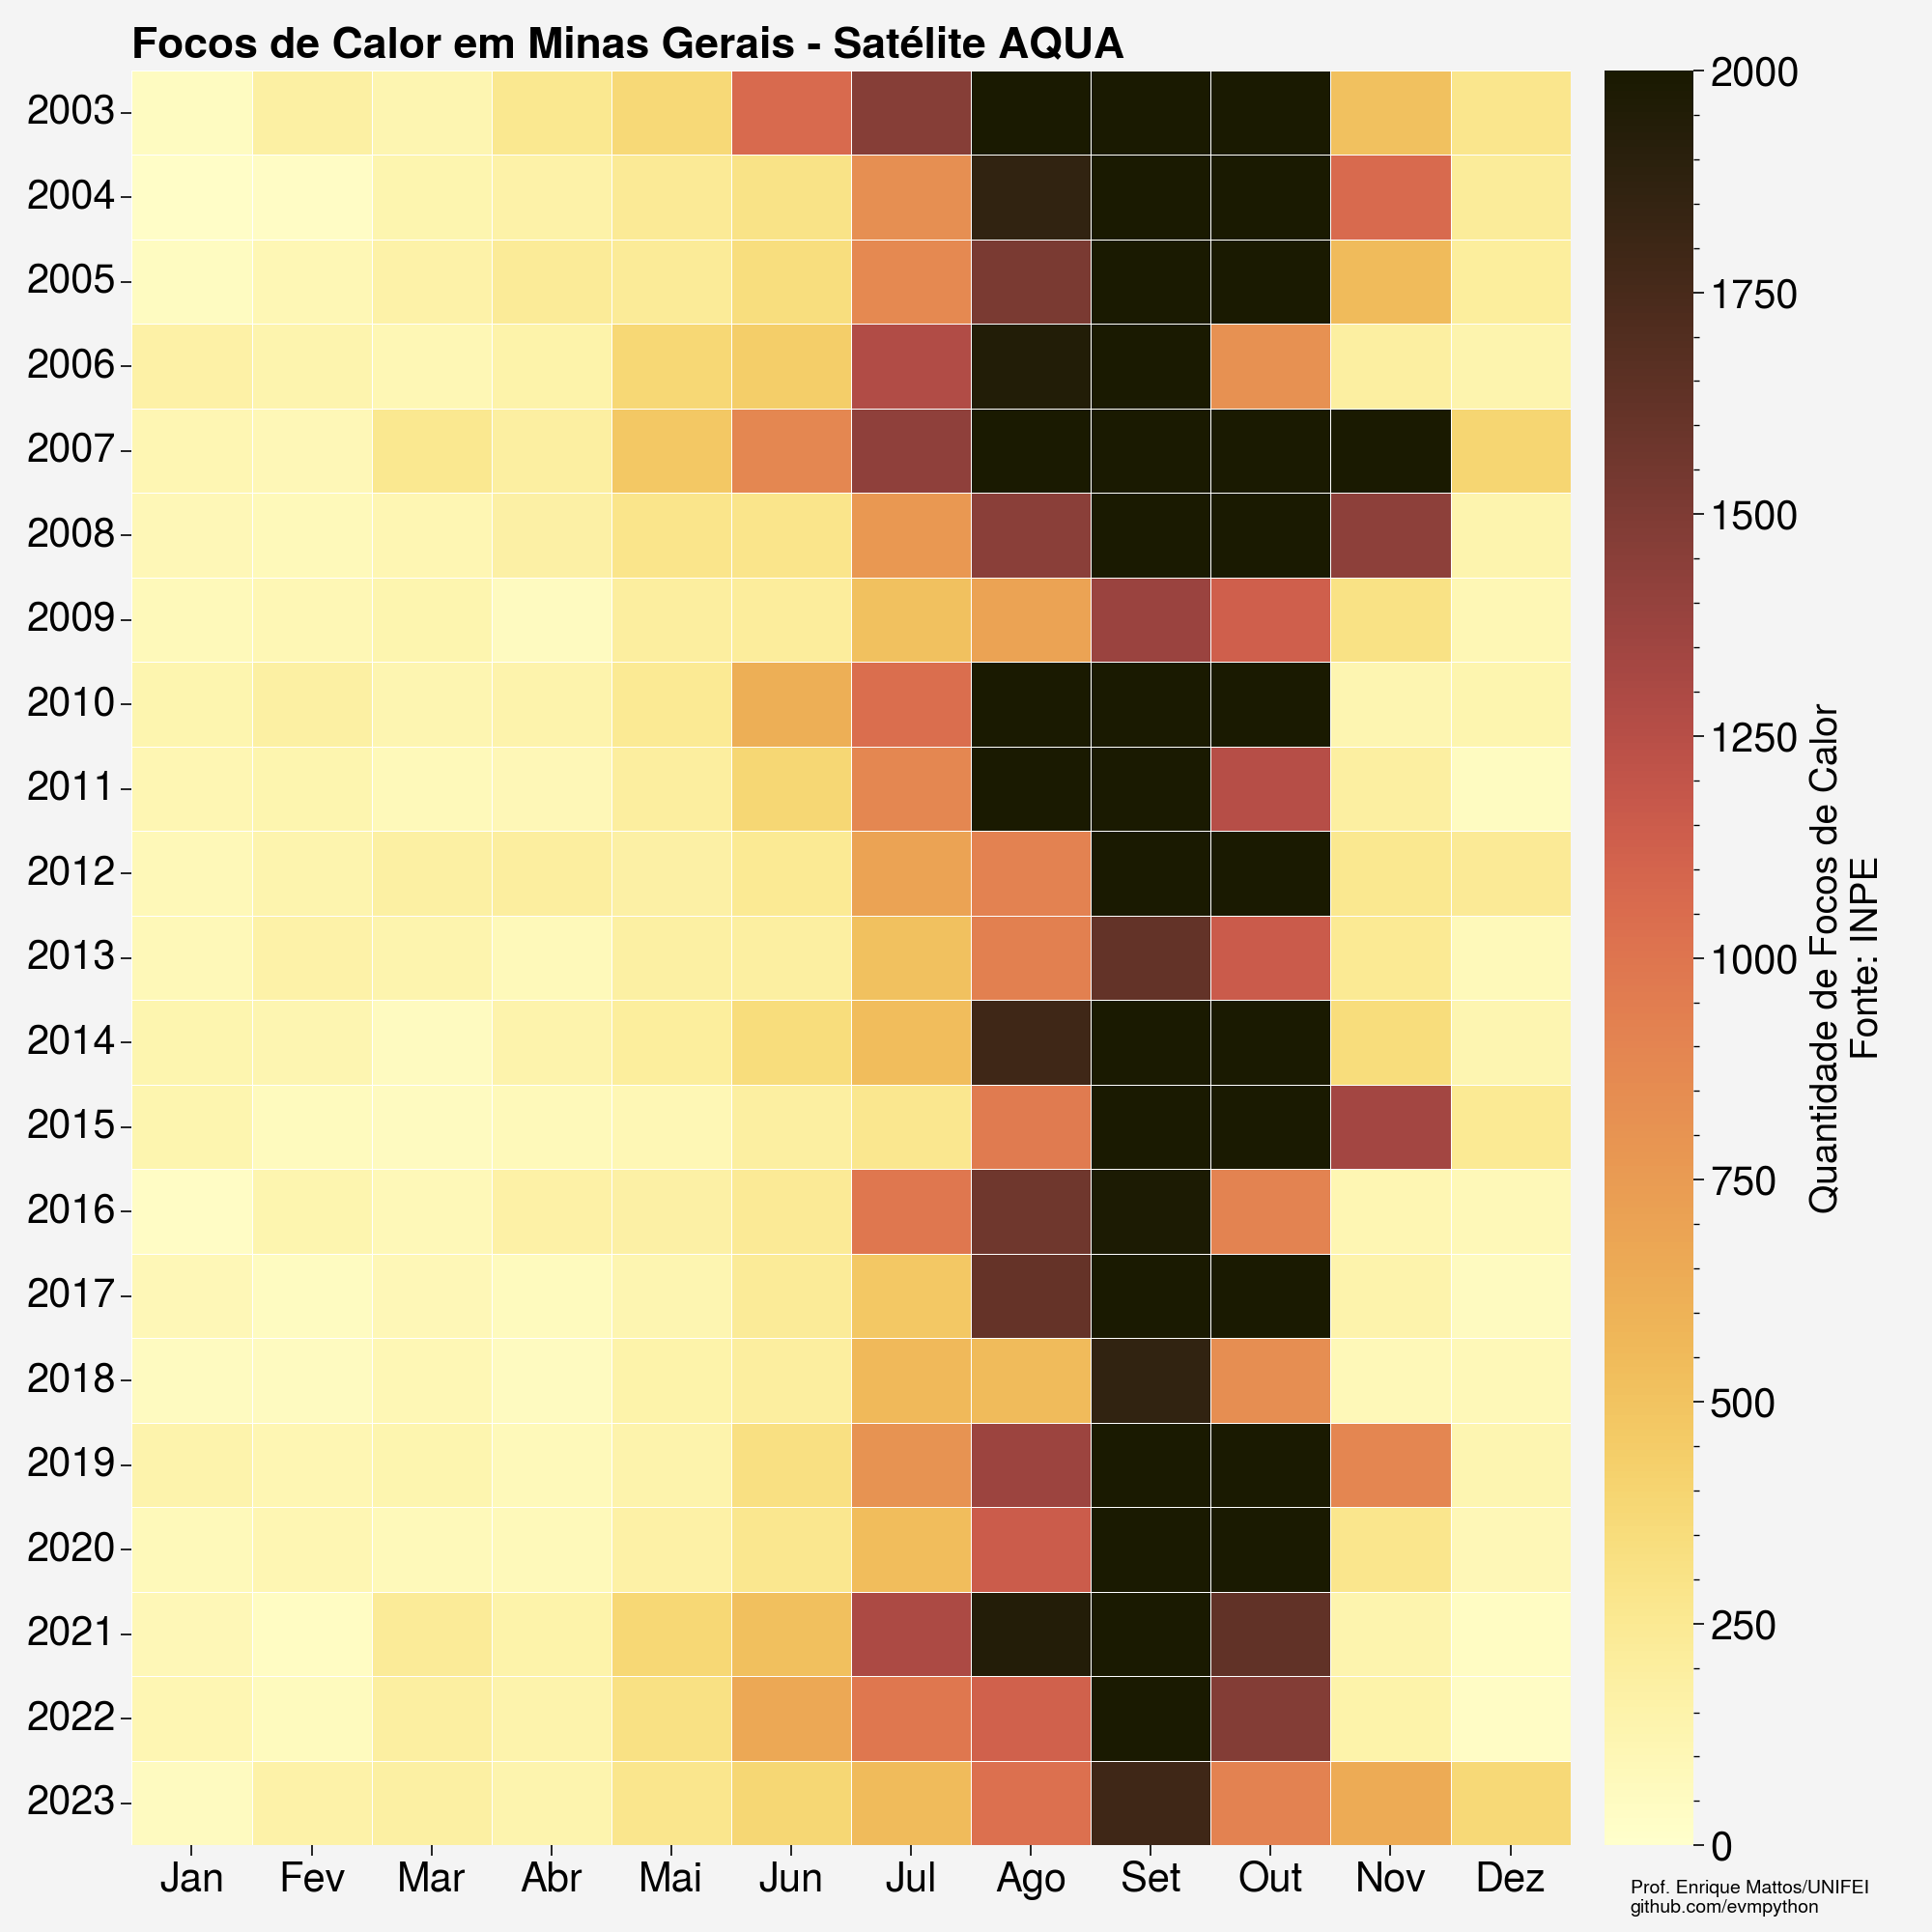

In [8]:
%%time
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(10,10))

# criando heatmap com seaborn
sns.heatmap(focos_table,
            vmin=0, vmax=2000,
            cmap='lajolla',
            xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
            yticklabels=pplt.arange(anoi, anof, 1),
            linewidth=0.2,
            linecolor='white',
            cbar_kws={'label': ' ',
                      'shrink': 1.0,
                      'pad': 0.02,
                      'orientation': 'vertical'},
            annot=False,
            annot_kws={'color': 'black',
                       'fontsize': 10,
                       'fontweight': 'medium'})

# configurações da barra de cores
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15, axis="both")
cbar.set_label('Quantidade de Focos de Calor\nFonte: INPE', fontsize=14)

# título
ax.set_title('Focos de Calor em Minas Gerais - Satélite AQUA', fontsize=16, color='black', fontweight='bold', loc='left')

# retirar os minorticks
ax.minorticks_off()

# orientações labels do eixo Y
plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation=0, fontsize=15)

# informação na figura
ax.text(12.5, 21.8, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black')

# salva figura
plt.tight_layout()
plt.savefig('year_month_plot.jpg', bbox_inches='tight', dpi=300)
plt.show()

CPU times: user 1.84 s, sys: 604 ms, total: 2.44 s
Wall time: 1.93 s
